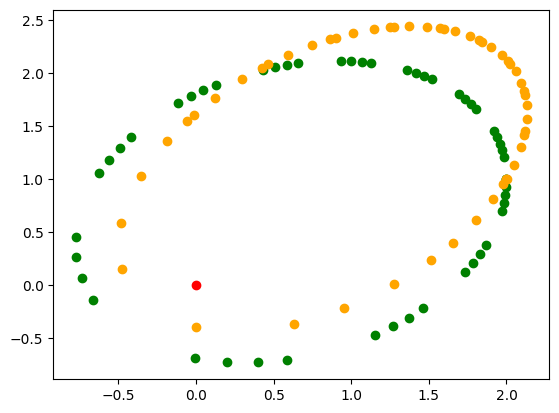

In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from matplotlib import animation,rc
from IPython.display import HTML
rc('animation', html='jshtml')

n=5000
t0=0
x0=2
y0=1
vx0=0.0
vy0=0.5
ts1=[t0]
xs=[x0]
ys=[y0]
t=50
coefficient=1
def derivative(x,y,vx,vy):
    r=math.sqrt(x**2+y**2)
    dvxdt=-coefficient*x/(r**3)
    dvydt=-coefficient*y/(r**3)
    dxdt=vx
    dydt=vy
    return dvxdt,dvydt,dxdt,dydt
history=[]
x=x0
y=y0
vx=vx0
vy=vy0
delta=(t-t0)/n
for i in range(n):
    k1vx,k1vy,k1x,k1y=derivative(x,y,vx,vy)
    k2vx,k2vy,k2x,k2y=derivative(x+k1x*delta/2,y+k1y*delta/2,vx+k1vx*delta/2,vy+k1vy*delta/2)
    k3vx,k3vy,k3x,k3y=derivative(x+2*delta*k2x-delta*k1x,y+2*delta*k2y-delta*k1y,vx+2*delta*k2vx-delta*k1vx,vy+2*delta*k2vy-delta*k1vy)
    x=x+delta*(k1x+4*k2x+k3x)/6
    y=y+delta*(k1y+4*k2y+k3y)/6
    vx=vx+delta*(k1vx+4*k2vx+k3vx)/6
    vy=vy+delta*(k1vy+4*k2vy+k3vy)/6
    ts2=t0+i*delta
    if i%100==0:
       ts1.append(ts2)
       xs.append(x)
       ys.append(y)
plt.scatter(0,0,color='red')
plt.scatter(xs,ys,color='green')
vx0=0.2
vy0=0.5
xs1=[x0]
ys1=[y0]
x=x0
y=y0
vx=vx0
vy=vy0
delta=(t-t0)/n
for i in range(n):
    k1vx,k1vy,k1x,k1y=derivative(x,y,vx,vy)
    k2vx,k2vy,k2x,k2y=derivative(x+k1x*delta/2,y+k1y*delta/2,vx+k1vx*delta/2,vy+k1vy*delta/2)
    k3vx,k3vy,k3x,k3y=derivative(x+2*delta*k2x-delta*k1x,y+2*delta*k2y-delta*k1y,vx+2*delta*k2vx-delta*k1vx,vy+2*delta*k2vy-delta*k1vy)
    x=x+delta*(k1x+4*k2x+k3x)/6
    y=y+delta*(k1y+4*k2y+k3y)/6
    vx=vx+delta*(k1vx+4*k2vx+k3vx)/6
    vy=vy+delta*(k1vy+4*k2vy+k3vy)/6
    ts2=t0+i*delta
    if i%100==0:
       xs1.append(x)
       ys1.append(y)
plt.scatter(xs1,ys1,color='orange') 
fig,ax=plt.subplots()#Artistオブジェクトの取得
plt.xlim(-1,3)#x座標は-1から3までを表示
plt.ylim(-2,4)#y座標は-2から2までを表示
for i in range(n//100):
    scat1=plt.scatter(xs[i],ys[i],color='green')
    scat2=plt.scatter(0,0,color='red')
    title=plt.text(0.5,1.01,'Time = '+str(round(ts1[i])),horizontalalignment='center',verticalalignment='bottom',transform=ax.transAxes)#時刻をタイトルとして表示
    history.append([scat1,scat2,title])

anim=animation.ArtistAnimation(fig,history,interval=50,blit=True)#アニメーションの作成
plt.close()
anim#アニメーションの表示


三次近似によるアニメーションを記述した
授業のスライドを参考にしながらもできるだけ簡潔になるように工夫した
二つのアニメーションを並べることも考えたが長くなりそうなため分けた
初期値の変更は2つ目のグラフからわかる